In [1]:
!pip install pandas-datareader
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

pyo.init_notebook_mode(connected = True)



In [2]:
end = dt.datetime.now()
start = dt.datetime(2015,1,1)

df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2015-01-01  85.277962  84.661308  84.959686  85.277962   949439.0  58.036236
2015-01-04  85.775269  85.049202  85.238182  85.486832  1351651.0  58.178391
2015-01-05  85.337639  84.412651  84.641411  84.840332  2477275.0  57.738419
2015-01-06  85.029312  84.094376  84.850281  84.651360  2127190.0  57.609802
2015-01-07  85.188446  84.671249  85.079041  84.929848  1997761.0  57.799343

In [3]:
df['MA50'] = df['Close'].rolling(window=50, min_periods=0).mean() 
df['MA200'] = df['Close'].rolling(window=200, min_periods=0).mean() 

df['MA50'].head(20)
df['MA200'].head(20)

Date
2015-01-01    85.277962
2015-01-04    85.382397
2015-01-05    85.201708
2015-01-06    85.064121
2015-01-07    85.037267
2015-01-08    85.127113
2015-01-11    85.135875
2015-01-12    85.098932
2015-01-13    84.891169
2015-01-14    84.708051
2015-01-15    84.563651
2015-01-18    84.404363
2015-01-19    84.300184
2015-01-20    84.294009
2015-01-21    84.325789
2015-01-22    84.415760
2015-01-26    84.577055
2015-01-27    84.724296
2015-01-28    84.911528
2015-01-29    85.108382
Name: MA200, dtype: float64

In [4]:
fig = make_subplots(rows=2, cols=1, shared_xaxes = True, vertical_spacing=0.1, subplot_titles=('CBA', 'Volumn'), row_width = [0.2, 0.7])

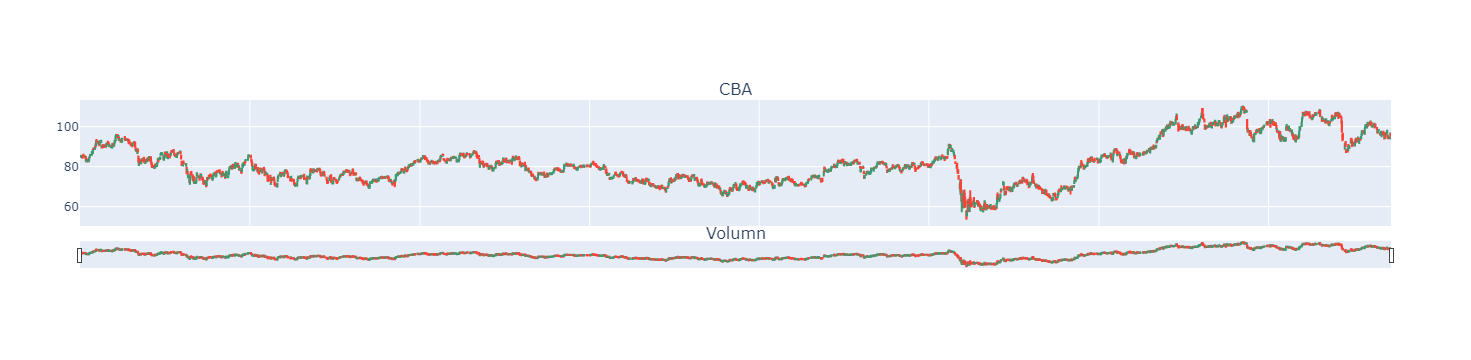

In [5]:
fig.add_trace(go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low = df['Low'], close = df['Close'], name='OHLC'), row=1, col=1)

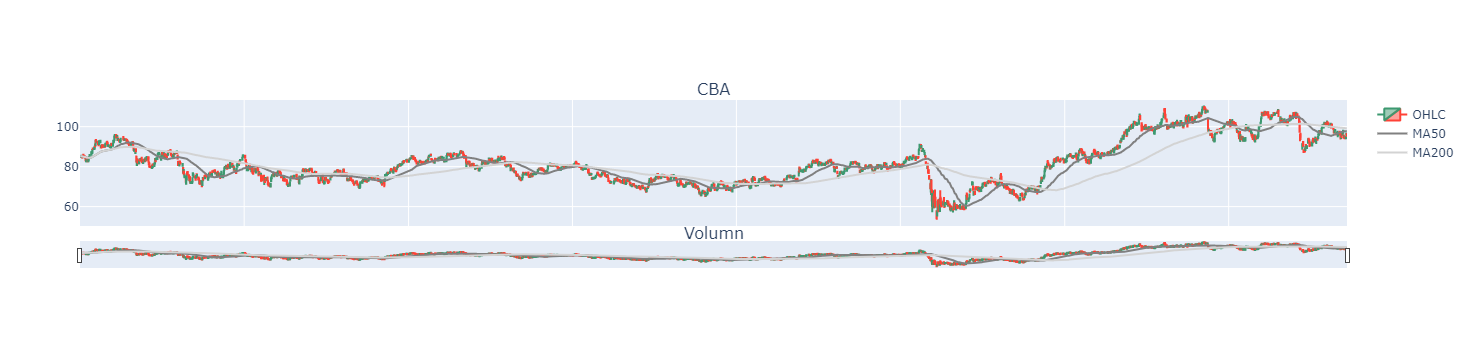

In [6]:
fig.add_trace(go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'), row=1, col=1)

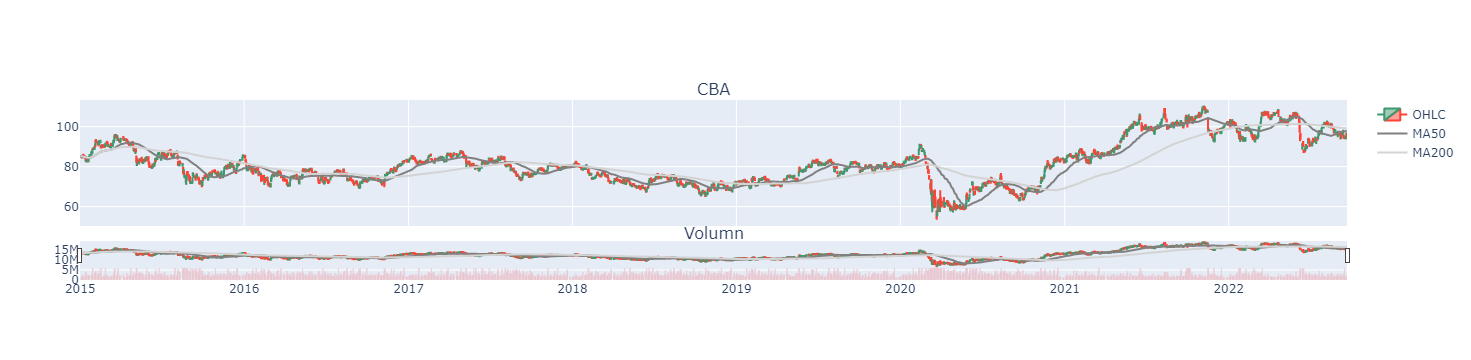

In [11]:
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], marker_color='red', showlegend=False), row=2, col=1)

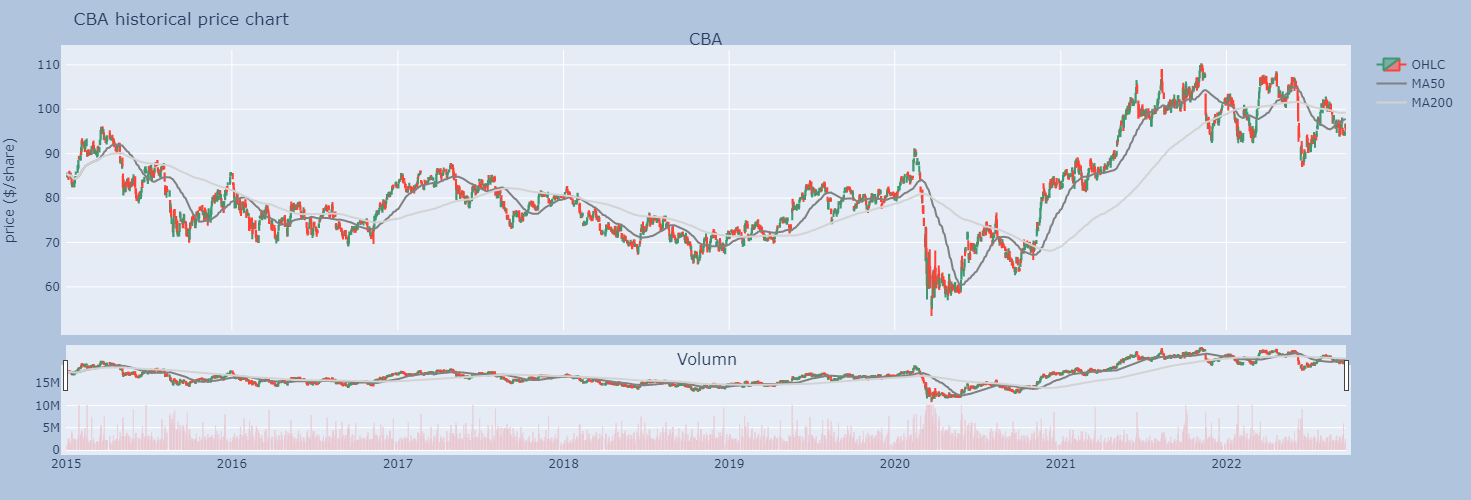

In [15]:
fig.update_layout(
    title='CBA historical price chart',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title='price ($/share)',
        titlefont_size =14,
        tickfont_size =12),
    autosize=False,
    width=800, 
    height=500,
    margin=dict(l=50,r=50,b=50,t=50, pad=5),
    paper_bgcolor = 'LightSteelBlue'
)

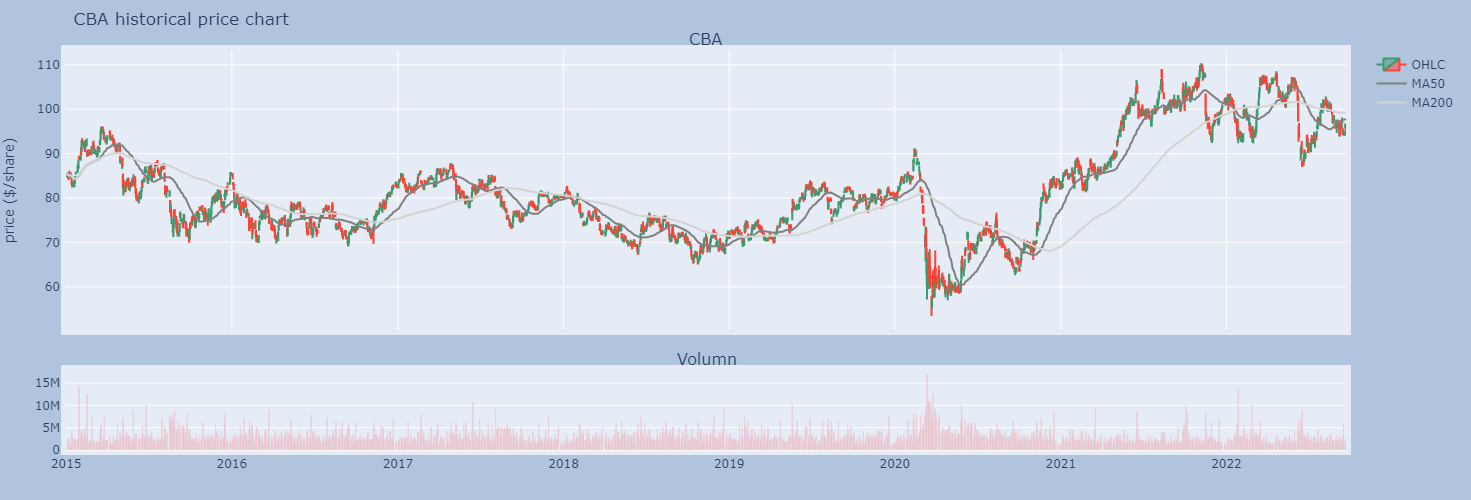

In [18]:
fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()